# Module 15 - Introduction to Unsupervised Learning
---

## Module Overview

Now that you have completed a deep dive into supervised learning, you will learn about unsupervised learning, which involves data that doesn't have a natural output variable whose values you want to predict. You will study the class of methods for unsupervised learning called clustering, which, in keeping with its name, provides greater insights into data by splitting it into groups or clusters.

## Learning outcomes

- LO 1: Extend the concept of distance to clusters.
- LO 2: Conduct a hierarchical clustering and draw a dendrogram.
- LO 3: Provide examples that prevent the best possible clustering.
- LO 4: Conduct a k-means clustering.
- LO 5: Identify practical issues that arise with clustering and how to manage them.
- LO 6: Discuss the real-life applications of clustering.
- LO 7: Apply k-means and hierarchical clustering in Python to real-life data.
- LO 8: Refine a codebase for machine learning competitions.

## Misc and Keywords
**Linkage** refers to the method used to determine the distance between two clusters when merging them

---

## Introduction
We now move on to unsupervised learning and will investigate the first class of unsupervised learning know as clustering.

## Clustering

Splits data into different clusters, such that data in each group is as similar as possible, and data from different groups as dissimilar as possible.

Can understand data better when it is clustered. 

In this module we will learn about **hierarchial clustering**, and **k-means clustering**.

### Clustering analysis
When measuring the difference between two clusters, you need to specify the linkage as well as the distance metric (i.e., euclidean, manhattan) to use. For example, you might define the distance between two clusters using the minimum linkage and the 2-norm. For measuring the distance between two points, you only need to specify the distance metric. 

In hierarchical clustering, **linkage** refers to the method used to determine the distance between two clusters when merging them. Different linkage criteria define how the distance between clusters is calculated based on the distances between their individual points.

##### Common Types of Linkage:

1. **Single Linkage (Minimum Linkage)**  
   - Distance between two clusters is defined as the **shortest** distance between any pair of points (one from each cluster).  
   - Encourages chaining effects (long, string-like clusters).  
   - Formula:  
     $$
     d(A, B) = \min \{ d(x, y) \} \quad \forall x \in A, y \in B
     $$

2. **Complete Linkage (Maximum Linkage)**  
   - Distance between two clusters is defined as the **longest** distance between any pair of points.  
   - Results in more compact clusters.  
   - Formula:  
     $$
     d(A, B) = \max \{ d(x, y) \} \quad \forall x \in A, y \in B
     $$

3. **Average Linkage (Mean Linkage)**  
   - Distance is the **average** distance between all pairs of points (one from each cluster).  
   - A balance between single and complete linkage.  
   - Formula:  
     $$
     d(A, B) = \frac{1}{|A| |B|} \sum_{x \in A} \sum_{y \in B} d(x, y)
     $$

4. **Centroid Linkage**  
   - Distance is calculated between the **centroids** (mean points) of the two clusters.  
   - Can cause inversions where clusters merge in a non-hierarchical way.  
   - Formula:  
     $$
     d(A, B) = d(\text{centroid}(A), \text{centroid}(B))
     $$

Each linkage method affects the shape and structure of the resulting clusters. The choice of linkage should align with the data characteristics and the clustering objective.





---

### Hierarchical clustering
In hierarchical clustering, you treat each data point as a cluster of its own and keep merging the clusters with the smallest distance until only one is left. This way of grouping clusters is called 'hierarchical' because it creates ranks that are dependent on the distance. A very common way to represent these clusters visually is as a tree graph, also known as a dendrogram which assists when splitting the clusters 

#### Algorithm

1. **Initialise Clusters**:
   - Start with each data point $x_i$ as its own cluster, i.e., $C_i = \{ x_i \}$ for $i = 1, ..., N$.

2. **Compute the Distance Matrix**:
   - Compute the distance between every pair of data points. Typically, the Euclidean distance is used:
   $$ \text{distance}(x_i, x_j) = \sqrt{\sum_{m=1}^d (x_{i,m} - x_{j,m})^2} $$

3. **Merge Closest Clusters**:
   - Find the two closest clusters (let’s say $C_i$ and $C_j$) based on the distance between them.
   - Merge the two clusters into one new cluster:
   $$ C_{\text{new}} = C_i \cup C_j $$

4. **Update the Distance Matrix**:
   - Recompute the distance matrix by updating the distances between the new cluster $C_{\text{new}}$ and all other remaining clusters.
   - There are different ways to compute the distance between two clusters:
     - **Single linkage**: Distance between two clusters is the minimum distance between any pair of points, one from each cluster.
     - **Complete linkage**: Distance between two clusters is the maximum distance between any pair of points, one from each cluster.
     - **Average linkage**: Distance between two clusters is the average distance between all pairs of points, one from each cluster.

5. **Repeat**:
   - Repeat steps 3 and 4 until all points are merged into one single cluster. The result can be represented as a dendrogram, which visually shows the order in which clusters were merged.

6. **Cut the Dendrogram**:
   - To obtain a specific number of clusters, cut the dendrogram at a certain level where the distance between merged clusters exceeds a threshold. This gives you the desired number of clusters.


##### Advantages
- Is purely data driven; has no a priori parameters to choose from
- Is easy to interpret the dendrogram, as it shows the clustering process
- Do not have to implicitly provide cluster numbers beforehand
##### Disadvantages
- Makes only one (myopic) pass through the data
- Has low stability: can lead to very different results if only a few observations are left out
- Tends to be sensitive to outliers

##### Example:

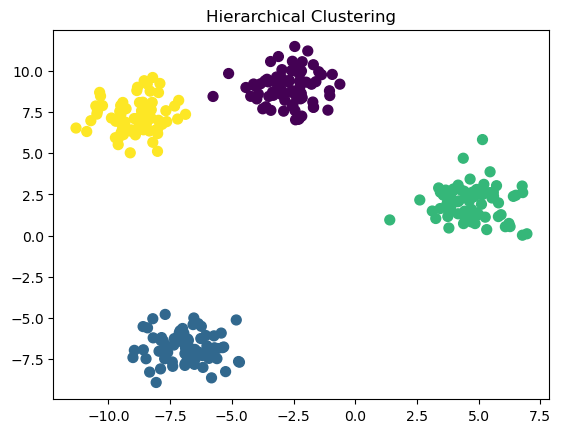

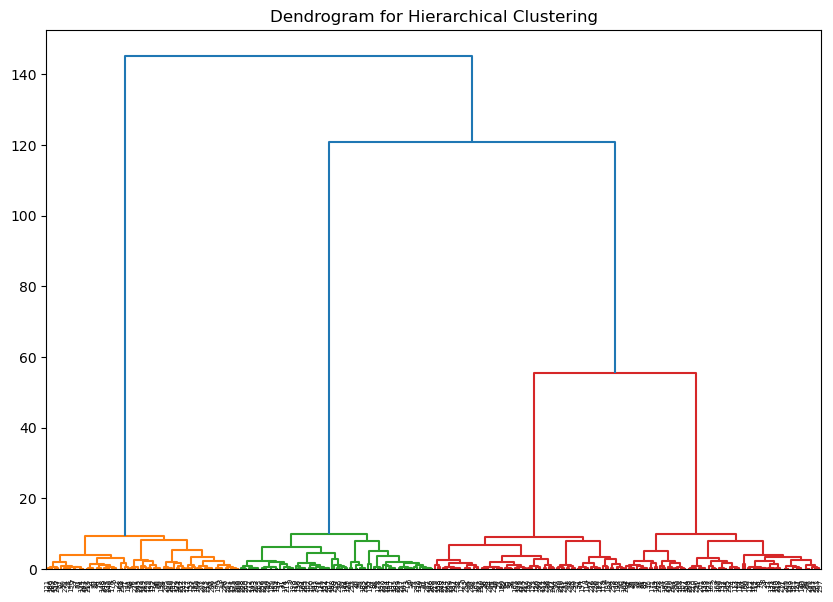

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as sch

# Generate synthetic data with 4 clusters
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Perform Agglomerative Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
y_hierarchical = hierarchical.fit_predict(X)

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_hierarchical, s=50, cmap='viridis')
plt.title("Hierarchical Clustering")
plt.show()

# Dendrogram for Hierarchical Clustering (optional)
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

--- 
### K-means clustering
In K-means clustering, the algorithm starts by selecting a predefined number of clusters, $k$, and randomly initialises the centroids of these clusters. It then assigns each data point to the nearest centroid based on a distance metric, typically Euclidean distance. After all points are assigned to a cluster, the centroids are recalculated as the mean of all points in that cluster. This process of assignment and updating centroids is repeated iteratively until the centroids no longer change significantly or the maximum number of iterations is reached. The resulting clusters are created based on the proximity of data points to the centroids, and the method is called "K-means" because it uses the mean (average) of points in a cluster to determine its center. The final clusters can be visualised as groups of data points, with each point being assigned to the cluster whose centroid is closest.

#### Algorithm

1. **Initialise the Centroids**:
   - Start by randomly selecting $k$ initial centroids $C_1, C_2, ..., C_k$ from the dataset, where $k$ is the number of desired clusters.

2. **Assign Points to Nearest Centroid**:
   - For each data point $x_i$, where $i = 1, ..., N$, assign it to the nearest centroid. 
   - This is done by calculating the distance from $x_i$ to each centroid $C_j$ using a distance metric such as Euclidean distance:
   $$ \text{distance}(x_i, C_j) = \sqrt{\sum_{m=1}^d (x_{i,m} - C_{j,m})^2} $$
   - Assign $x_i$ to the cluster $C_j$ such that $C_j$ is the closest centroid:
   $$ \text{cluster}(x_i) = \arg\min_j \text{distance}(x_i, C_j) $$

3. **Update the Centroids**:
   - Once all points are assigned to clusters, calculate the new centroid of each cluster by taking the mean of all the points in that cluster:
   $$ C_j = \frac{1}{N_j} \sum_{x_i \in C_j} x_i $$
   where $N_j$ is the number of points in cluster $C_j$.

4. **Repeat**:
   - Repeat steps 2 and 3 until convergence. Convergence occurs when the centroids no longer change, or the change is smaller than a defined threshold.


##### Advantages
- Is very easy to implement
- Often produces better results than hierarchical clustering
- Is faster than hierarchical clustering for large datasets
- Can lead to better results
##### Disadvantages
- Is difficult to predict the correct number for k clusters
- Depends on a random initialisation step for its outcome
- Provides less intuitive outputs
- Cluster quantity needs to be defined apriori

To find the optimal number of clusters, we can use the elbow rule, which states that on the curve of score vs the number of clusters, the optimal point is where the first bend (or elbow) occurs, because after that the the score eventually decreases to zero and each point starts behaving as its own cluster.

##### Example

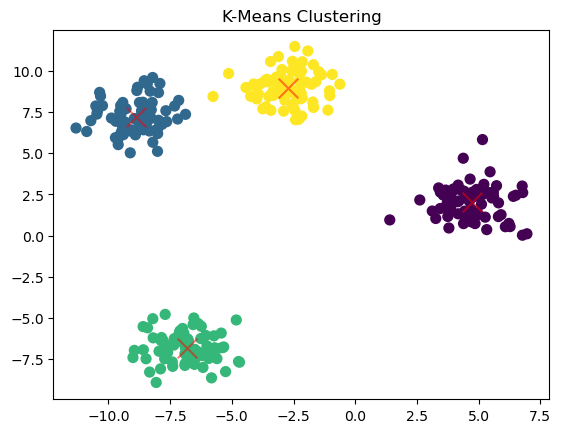

In [3]:
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data with 4 clusters
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='x')

plt.title("K-Means Clustering")
plt.show()

---

### Practical Concerns
- Number of clusters to choose:
    - Domain knowledge
    - Elbow charts
    - Practical constraints (i.e., number of marketing campaigns you want to run)
- Cluster interpretability:
    - What is the average and variation of features within each cluster?
    - What is the difference of features between cluster pairs?
    - Can we assign meaningful labels to clusters?
- Cluster Stability:
    - Cluster half of the data
    - Assign the other half of the data to the nearest centroids
    - Is the result similar to the clustering of all data?